In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 

df = pd.read_csv('./data/df.csv',sep=',')
df  = df.sort_values(by='time',ascending=True).reset_index(drop=True)

BATCHSIZE = 256
LOOKBACK = 10


date = ["2024-02-19",
"2024-03-15",
"2024-04-19",
"2024-05-17",
"2024-06-21",
"2024-07-19",
"2024-08-16",
"2024-09-20",
"2024-10-18",
"2024-11-15",
"2024-12-20",
"2025-01-17"]
df.head()

df['time'] = pd.to_datetime(df['time'])
df['date'] = df['time'].dt.date
df['date'] = df['date'].astype(str)
df['hour'] = df['time'].dt.hour
df['minute'] = df['time'].dt.minute 
# for i in range(1,5):
#     df[f'spread_shift_{i}'] = df.groupby(['hour','minute'])['spread'].shift(i)

df['Expiration_Date'] = df['date'].apply(lambda x: 1 if x in date else 0)
# df.fillna(0,inplace=True)


df.dropna(inplace=True)

df.head()


,time,IF00_close,IF01_close,spread,date,hour,minute,Expiration_Date
0,2024-01-24 09:30:00,3240.0,3236.8,-3.2,2024-01-24,9,30,0
1,2024-01-24 09:31:00,3241.4,3243.0,1.6,2024-01-24,9,31,0
2,2024-01-24 09:32:00,3240.0,3243.0,3.0,2024-01-24,9,32,0
3,2024-01-24 09:33:00,3234.4,3235.6,1.2,2024-01-24,9,33,0
4,2024-01-24 09:34:00,3235.8,3236.0,0.2,2024-01-24,9,34,0


In [27]:
import yaml 
with open('configs/data.yaml', 'r') as file:
    data_config = yaml.safe_load(file)
# data_config = yaml.load(open('configs/data.yaml', 'r')) 
data_config


{'data': {'lookback': 5,
  'train_test_split': 0.67,
  'shuffle': True,
  'data_path': 'data/data.csv'},
 'volatility': {'window': 20, 'method': 'log_returns'}}

In [28]:
df['Expiration_Date_diff'] = df['Expiration_Date'].diff() 
df['Expiration_Date_diff'] = df['Expiration_Date_diff'].fillna(0)

df.head() 



,time,IF00_close,IF01_close,spread,date,hour,minute,Expiration_Date,Expiration_Date_diff
0,2024-01-24 09:30:00,3240.0,3236.8,-3.2,2024-01-24,9,30,0,0.0
1,2024-01-24 09:31:00,3241.4,3243.0,1.6,2024-01-24,9,31,0,0.0
2,2024-01-24 09:32:00,3240.0,3243.0,3.0,2024-01-24,9,32,0,0.0
3,2024-01-24 09:33:00,3234.4,3235.6,1.2,2024-01-24,9,33,0,0.0
4,2024-01-24 09:34:00,3235.8,3236.0,0.2,2024-01-24,9,34,0,0.0


In [29]:
df['Expiration_Date_diff'] = df['Expiration_Date_diff'].apply(lambda x: 0 if x!=1 else 1)
df['group'] = df['Expiration_Date_diff'].cumsum() 




In [30]:
df[df['Expiration_Date_diff'] == 1]

df_expiration = df[df['Expiration_Date_diff'] == 1]
df_expiration['group'] = df_expiration['group'] - 1 

expiration_dict = df_expiration.set_index('group')['time'].to_dict()

expiration_dict


df['next_expiration_time'] = df['group'].map(expiration_dict) 
df 


C:\Users\gaoxc\AppData\Local\Temp\ipykernel_33516\1225383197.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_expiration['group'] = df_expiration['group'] - 1


,time,IF00_close,IF01_close,spread,date,hour,minute,Expiration_Date,Expiration_Date_diff,group,next_expiration_time
0,2024-01-24 09:30:00,3240.0,3236.8,-3.2,2024-01-24,9,30,0,0,0,2024-02-19 09:30:00
1,2024-01-24 09:31:00,3241.4,3243.0,1.6,2024-01-24,9,31,0,0,0,2024-02-19 09:30:00
2,2024-01-24 09:32:00,3240.0,3243.0,3.0,2024-01-24,9,32,0,0,0,2024-02-19 09:30:00
3,2024-01-24 09:33:00,3234.4,3235.6,1.2,2024-01-24,9,33,0,0,0,2024-02-19 09:30:00
4,2024-01-24 09:34:00,3235.8,3236.0,0.2,2024-01-24,9,34,0,0,0,2024-02-19 09:30:00
...,...,...,...,...,...,...,...,...,...,...,...
58558,2025-01-24 14:56:00,3835.2,3837.8,2.6,2025-01-24,14,56,0,0,12,NaT
58559,2025-01-24 14:57:00,3834.4,3837.8,3.4,2025-01-24,14,57,0,0,12,NaT
58560,2025-01-24 14:58:00,3835.0,3838.0,3.0,2025-01-24,14,58,0,0,12,NaT
58561,2025-01-24 14:59:00,3836.0,3839.2,3.2,2025-01-24,14,59,0,0,12,NaT


In [31]:
df_date_all = df[['date','Expiration_Date']].drop_duplicates()
for i in range(1,4):
    df_date_all[f'Expiration_Date_shift_{i}'] = df_date_all['Expiration_Date'].shift(-i)
df_date_all['label'] = df_date_all['Expiration_Date_shift_1'] + df_date_all['Expiration_Date_shift_2'] + df_date_all['Expiration_Date_shift_3']

df_date_all_before_expiration = df_date_all[df_date_all['label'] == 1]

df_date_all_before_expiration['month'] = df_date_all_before_expiration['date'].apply(lambda x: x.split('-')[1])
df_date_all_before_expiration['expiration_day'] = df_date_all_before_expiration.groupby('month')['label'].cumsum()

df_date_all_before_expiration['expiration_day'] = 4-df_date_all_before_expiration['expiration_day']

date_expiration_dict = df_date_all_before_expiration.set_index('date')['expiration_day'].to_dict()
date_expiration_dict


df['expiration_day'] = df['date'].map(date_expiration_dict)
df['expiration_day'] = df['expiration_day'].fillna(0)

df 





C:\Users\gaoxc\AppData\Local\Temp\ipykernel_33516\1214286887.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date_all_before_expiration['month'] = df_date_all_before_expiration['date'].apply(lambda x: x.split('-')[1])
C:\Users\gaoxc\AppData\Local\Temp\ipykernel_33516\1214286887.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date_all_before_expiration['expiration_day'] = df_date_all_before_expiration.groupby('month')['label'].cumsum()
C:\Users\gaoxc\AppData\Local\Temp\ipykernel_33516\121428688

,time,IF00_close,IF01_close,spread,date,hour,minute,Expiration_Date,Expiration_Date_diff,group,next_expiration_time,expiration_day
0,2024-01-24 09:30:00,3240.0,3236.8,-3.2,2024-01-24,9,30,0,0,0,2024-02-19 09:30:00,0.0
1,2024-01-24 09:31:00,3241.4,3243.0,1.6,2024-01-24,9,31,0,0,0,2024-02-19 09:30:00,0.0
2,2024-01-24 09:32:00,3240.0,3243.0,3.0,2024-01-24,9,32,0,0,0,2024-02-19 09:30:00,0.0
3,2024-01-24 09:33:00,3234.4,3235.6,1.2,2024-01-24,9,33,0,0,0,2024-02-19 09:30:00,0.0
4,2024-01-24 09:34:00,3235.8,3236.0,0.2,2024-01-24,9,34,0,0,0,2024-02-19 09:30:00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
58558,2025-01-24 14:56:00,3835.2,3837.8,2.6,2025-01-24,14,56,0,0,12,NaT,0.0
58559,2025-01-24 14:57:00,3834.4,3837.8,3.4,2025-01-24,14,57,0,0,12,NaT,0.0
58560,2025-01-24 14:58:00,3835.0,3838.0,3.0,2025-01-24,14,58,0,0,12,NaT,0.0
58561,2025-01-24 14:59:00,3836.0,3839.2,3.2,2025-01-24,14,59,0,0,12,NaT,0.0


In [32]:
df[df['expiration_day'] != 0]


,time,IF00_close,IF01_close,spread,date,hour,minute,Expiration_Date,Expiration_Date_diff,group,next_expiration_time,expiration_day
2169,2024-02-06 09:30:00,3171.2,3121.0,-50.2,2024-02-06,9,30,0,0,0,2024-02-19 09:30:00,3.0
2170,2024-02-06 09:31:00,3181.8,3143.0,-38.8,2024-02-06,9,31,0,0,0,2024-02-19 09:30:00,3.0
2171,2024-02-06 09:32:00,3179.0,3141.8,-37.2,2024-02-06,9,32,0,0,0,2024-02-19 09:30:00,3.0
2172,2024-02-06 09:33:00,3193.0,3154.8,-38.2,2024-02-06,9,33,0,0,0,2024-02-19 09:30:00,3.0
2173,2024-02-06 09:34:00,3199.4,3160.4,-39.0,2024-02-06,9,34,0,0,0,2024-02-19 09:30:00,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
57112,2025-01-16 14:56:00,3797.6,3796.2,-1.4,2025-01-16,14,56,0,0,11,2025-01-17 09:30:00,1.0
57113,2025-01-16 14:57:00,3796.6,3795.8,-0.8,2025-01-16,14,57,0,0,11,2025-01-17 09:30:00,1.0
57114,2025-01-16 14:58:00,3796.6,3795.0,-1.6,2025-01-16,14,58,0,0,11,2025-01-17 09:30:00,1.0
57115,2025-01-16 14:59:00,3796.6,3794.6,-2.0,2025-01-16,14,59,0,0,11,2025-01-17 09:30:00,1.0


In [33]:
df['std'] = df['spread'].rolling(window=200).std()
df['volatility'] = df['std'].apply(lambda x: np.log(x))
df.dropna(inplace=True)
df


,time,IF00_close,IF01_close,spread,date,hour,minute,Expiration_Date,Expiration_Date_diff,group,next_expiration_time,expiration_day,std,volatility
199,2024-01-24 14:19:00,3250.6,3245.8,-4.8,2024-01-24,14,19,0,0,0,2024-02-19 09:30:00,0.0,2.284265,0.826044
200,2024-01-24 14:20:00,3245.8,3241.0,-4.8,2024-01-24,14,20,0,0,0,2024-02-19 09:30:00,0.0,2.294348,0.830449
201,2024-01-24 14:21:00,3243.2,3239.0,-4.2,2024-01-24,14,21,0,0,0,2024-02-19 09:30:00,0.0,2.296284,0.831292
202,2024-01-24 14:22:00,3240.8,3235.0,-5.8,2024-01-24,14,22,0,0,0,2024-02-19 09:30:00,0.0,2.300440,0.833100
203,2024-01-24 14:23:00,3243.8,3238.0,-5.8,2024-01-24,14,23,0,0,0,2024-02-19 09:30:00,0.0,2.316842,0.840205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57112,2025-01-16 14:56:00,3797.6,3796.2,-1.4,2025-01-16,14,56,0,0,11,2025-01-17 09:30:00,1.0,0.618306,-0.480772
57113,2025-01-16 14:57:00,3796.6,3795.8,-0.8,2025-01-16,14,57,0,0,11,2025-01-17 09:30:00,1.0,0.627022,-0.466773
57114,2025-01-16 14:58:00,3796.6,3795.0,-1.6,2025-01-16,14,58,0,0,11,2025-01-17 09:30:00,1.0,0.624137,-0.471386
57115,2025-01-16 14:59:00,3796.6,3794.6,-2.0,2025-01-16,14,59,0,0,11,2025-01-17 09:30:00,1.0,0.617650,-0.481833


In [34]:
df.columns 

Index(['time', 'IF00_close', 'IF01_close', 'spread', 'date', 'hour', 'minute',
       'Expiration_Date', 'Expiration_Date_diff', 'group',
       'next_expiration_time', 'expiration_day', 'std', 'volatility'],
      dtype='object')

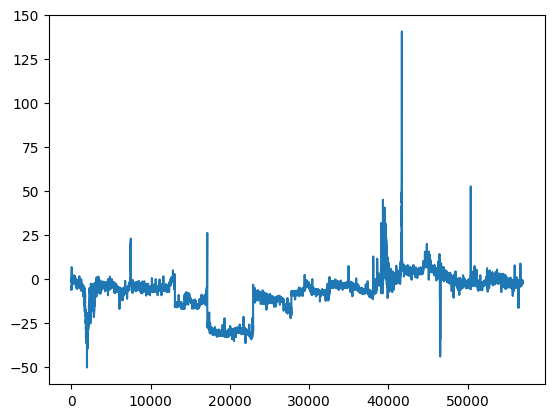

In [35]:


timeseries = df[["spread","volatility","hour","minute","expiration_day"]].values.astype('float32')

plt.plot(timeseries[:,0])
plt.show()

In [36]:
import torch 
torch.cuda.is_available()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device 


device(type='cuda', index=0)

In [37]:
# train-test split for time series
train_size = int(len(timeseries) * 0.67)
test_size = len(timeseries) - train_size
train, test = timeseries[:train_size], timeseries[train_size:]

In [38]:
train[0:1][:,0:1]
# np.array(train[5:6][0][0]).reshape(1,1)

array([[-4.8]], dtype=float32)

In [39]:
import torch

def create_dataset(dataset, lookback):
    """Transform a time series into a prediction dataset

    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction
    """
    dataset_spread = dataset[:,0:2]
    dataset_features = dataset[:,2:]
    X,features_date, y = [], [], []
    for i in range(len(dataset)-lookback):
        feature = dataset_spread[i:i+lookback]
        feature_date = dataset_features[i:i+lookback]
        target = dataset[i+lookback:i+lookback+1][:,0:1]
        X.append(feature)
        features_date.append(feature_date)
        y.append(target)
    X = np.array(X)
    features_date = np.array(features_date)
    y = np.array(y)
    return torch.tensor(X), torch.tensor(features_date,dtype=torch.int ), torch.tensor(y)

In [40]:
lookback = LOOKBACK 
X_train,X_train_features, y_train = create_dataset(train, lookback=lookback)
X_test,X_test_features, y_test = create_dataset(test, lookback=lookback)
print(X_train.shape,X_train_features.shape, y_train.shape)
print(X_test.shape,X_test_features.shape, y_test.shape)

torch.Size([38125, 10, 2]) torch.Size([38125, 10, 3]) torch.Size([38125, 1, 1])
torch.Size([18773, 10, 2]) torch.Size([18773, 10, 3]) torch.Size([18773, 1, 1])


In [41]:
y_train

tensor([[[-5.2000]],

        [[-5.2000]],

        [[-4.8000]],

        ...,

        [[-5.4000]],

        [[-5.6000]],

        [[-5.4000]]])

In [42]:
# ...
# import torch.nn as nn




# class AirModel(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.lstm = nn.LSTM(input_size=2, hidden_size=50, num_layers=1, batch_first=True)

#         self.lstm2 = nn.LSTM(input_size=50, hidden_size=50, num_layers=1, batch_first=True)

#         self.embedding_hour = nn.Embedding(24, 3)
#         self.embedding_minute = nn.Embedding(60,3)
#         self.embedding_day = nn.Embedding(4,3)

        

#         self.linear = nn.Linear(50, 1)
#         self.linear2 = nn.Linear(20, 1)
#     def forward(self, x,x_features):
#         x, (h_n, c_n) = self.lstm(x)
#         x, (h_n2, c_n2) = self.lstm2(x)
#         # x  = self.linear(h_n2[-1])
#         x = self.linear(x)
#         x = torch.cat((x,x_features),dim=-1)
#         # print(x.shape)
#         x = self.linear2(x.view(-1, 4*5))
#         # print(x.shape)
#         x = x.view(-1, 1, 1)
#         # x = x.unsqueeze(-1)
#         return x

In [43]:
...
import torch.nn as nn




class AirModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden_size = 20
        self.lstm = nn.LSTM(input_size=2, hidden_size=self.hidden_size, num_layers=1, batch_first=True)

        self.lstm2 = nn.LSTM(input_size=self.hidden_size, hidden_size=self.hidden_size, num_layers=1, batch_first=True)

        self.embedding_hour = nn.Embedding(24, 3)
        self.embedding_minute = nn.Embedding(60,3)
        self.embedding_day = nn.Embedding(4,3)
        self.pooling = nn.AdaptiveAvgPool1d(1)

        

        self.linear = nn.Linear(self.hidden_size, 1)

        self.linear3 = nn.Linear(10,1)
        # self.linear4 = nn.Linear(1,1)

        self.linear2 = nn.Linear(LOOKBACK, 1)
    def forward(self, x,x_features):
        x, (h_n, c_n) = self.lstm(x)
        x, (h_n2, c_n2) = self.lstm2(x)
        # x  = self.linear(h_n2[-1])
        x = self.linear(x)
        hour = self.embedding_hour(x_features[:,:,0])
        minute = self.embedding_minute(x_features[:,:,1])
        day = self.embedding_day(x_features[:,:,2])
        x_features_embedding = torch.cat((hour,
        minute,day),dim=-1)
        x = torch.cat((x,x_features_embedding),dim=-1)

        x = x.permute(0,2,1)

        x = self.linear3(x)
        x = x.permute(0,2,1).squeeze(-1)
        x = self.linear2(x)
        # x = self.pooling(x)
        # x = x.squeeze(-1)


        # print(x.shape)
        # x = self.linear2(x)
        # print(x.shape)
        # x = x.view(-1, 1, 1)
        #
        return x

In [44]:

aa = AirModel()
params = sum(p.numel() for p in aa.parameters())
print(f'Total number of parameters: {params}')
aa
# X_batch, y_batch = next(iter(loader))
# X_batch.shape, y_batch.shape

# x = aa(X_batch)
# x.shape 

# import torch.utils.data as data
# loader = data.DataLoader(data.TensorDataset(X_train,X_train, y_train), shuffle=True, batch_size=256)


# aa,bb,cc = next(iter(loader))
# aa.shape,bb.shape,cc.shape



Total number of parameters: 5587


AirModel(
  (lstm): LSTM(2, 20, batch_first=True)
  (lstm2): LSTM(20, 20, batch_first=True)
  (embedding_hour): Embedding(24, 3)
  (embedding_minute): Embedding(60, 3)
  (embedding_day): Embedding(4, 3)
  (pooling): AdaptiveAvgPool1d(output_size=1)
  (linear): Linear(in_features=20, out_features=1, bias=True)
  (linear3): Linear(in_features=10, out_features=1, bias=True)
  (linear2): Linear(in_features=10, out_features=1, bias=True)
)

In [45]:
import numpy as np
import torch.optim as optim
import torch.utils.data as data

model = AirModel().to(device)

optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(X_train,X_train_features, y_train), shuffle=True, batch_size=BATCHSIZE)

n_epochs = 1000
for epoch in range(n_epochs):
    model.train()
    for X_batch,X_batch_features, y_batch in loader:
        # print(X_batch.shape)
        X_batch = X_batch.to(device)
        X_batch_features = X_batch_features.to(device)
        y_batch = y_batch.to(device)
        y_pred = model(X_batch,X_batch_features)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    if epoch % 100 != 0:
        continue
    model.eval()
    with torch.no_grad():
        X_train = X_train.to(device)
        X_train_features = X_train_features.to(device)
        y_train = y_train.to(device)
        X_test = X_test.to(device)
        X_test_features = X_test_features.to(device)
        y_test = y_test.to(device)
        y_pred = model(X_train,X_train_features)
        train_rmse = torch.sqrt(loss_fn(y_pred, y_train))
        y_pred = model(X_test,X_test_features)
        test_rmse = torch.sqrt(loss_fn(y_pred, y_test))
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

Epoch 0: train RMSE 9.2800, test RMSE 7.1394
Epoch 100: train RMSE 0.7383, test RMSE 4.8564
Epoch 200: train RMSE 0.7327, test RMSE 4.8554
Epoch 300: train RMSE 0.7153, test RMSE 4.9026
Epoch 400: train RMSE 0.6893, test RMSE 5.2369
Epoch 500: train RMSE 0.6681, test RMSE 5.3686
Epoch 600: train RMSE 0.6586, test RMSE 5.6408
Epoch 700: train RMSE 0.6517, test RMSE 5.5309
Epoch 800: train RMSE 0.6448, test RMSE 5.5499
Epoch 900: train RMSE 0.6416, test RMSE 5.3316


In [46]:
y_pred.shape 

torch.Size([237, 1, 1])

In [47]:
with torch.no_grad():
    # shift train predictions for plotting
    train_plot = torch.ones_like(torch.tensor(timeseries)) * np.nan
    y_pred = model(X_train,X_train_features)
    y_pred = y_pred[:, -1, :]
    train_plot[lookback:train_size] = model(X_train,X_train_features)[:, -1, :]
    # shift test predictions for plotting
    test_plot = torch.ones_like(torch.tensor(timeseries)) * np.nan
    test_plot[train_size+lookback:len(timeseries)] = model(X_test,X_test_features)[:, -1, :]


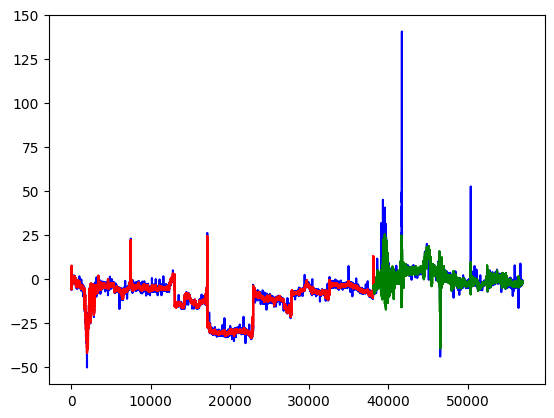

In [48]:
# plot

plt.plot(timeseries[:,0], c='b')
plt.plot(train_plot.cpu().numpy(), c='r')
plt.plot(test_plot.cpu().numpy(), c='g')
plt.show()

In [49]:
import plotly.graph_objects as go
import numpy as np

# 确保模型处于评估模式
model.eval()

# 生成预测
with torch.no_grad():
    # 训练集预测
    train_plot = np.ones_like(timeseries[:,0]) * np.nan
    train_plot[lookback:train_size] = model(X_train,X_train_features)[:, -1, :].cpu().numpy().flatten()
    
    # 测试集预测
    test_plot = np.ones_like(timeseries[:,0]) * np.nan
    test_plot[train_size+lookback:len(timeseries)] = model(X_test,X_test_features)[:, -1, :].cpu().numpy().flatten()

# 创建时间索引
time_index = np.arange(len(timeseries[:,0]))

# 创建交互式图表
fig = go.Figure()

# 添加原始数据线
fig.add_trace(go.Scatter(
    x=time_index,
    y=timeseries[:,0].flatten(),
    name='原始数据',
    line=dict(color='blue')
))

# 添加训练集预测线
fig.add_trace(go.Scatter(
    x=time_index,
    y=train_plot.flatten(),
    name='训练集预测',
    line=dict(color='red')
))

# 添加测试集预测线
fig.add_trace(go.Scatter(
    x=time_index,
    y=test_plot.flatten(),
    name='测试集预测',
    line=dict(color='green')
))

# 更新布局
fig.update_layout(
    title='LSTM时序预测结果',
    xaxis_title='时间步',
    yaxis_title='值',
    hovermode='x unified',  # 启用统一的悬停模式
    template='plotly_white'  # 使用白色主题
)

# 显示图表
# fig.show()

# 保存为HTML文件
fig.write_html('./html/lstm_timeseries_plot.html')

In [ ]:
date = ["2024-02-19",
"2024-03-15",
"2024-04-19",
"2024-05-17",
"2024-06-21",
"2024-07-19",
"2024-08-16",
"2024-09-20",
"2024-10-18",
"2024-11-15",
"2024-12-20",
"2025-01-17"]
date  

In [ ]:
import torch
import torch.nn as nn

emb = nn.Embedding(10, 50)

# 定义全连接层（输入特征5，输出特征1）
fc = nn.Linear(5, 1)

# 输入张量（形状 [512, 5, 1]）
input_tensor = torch.randn(512, 5, 1)

# 重塑并应用全连接层
output = fc(input_tensor.view(512, 5))  # 输出形状 [512, 1]

# 调整到目标形状 [512, 1, 1]
output = output.view(512, 1, 1)

print(output.shape)  # torch.Size([512, 1, 1])

In [ ]:
import torch
import torch.nn as nn

# Define the embedding layer
# num_embeddings: size of the dictionary of embeddings (e.g., vocabulary size)
# embedding_dim: the size of each embedding vector
embedding = nn.Embedding(num_embeddings=10, embedding_dim=2)

# Example input: a batch of indices
# Here, we have a batch of 2 samples, each with 4 indices
input_indices = torch.tensor([[1, 2, 4, 5], [4, 3, 2, 9]])

# Get the embeddings for the input indices
output = embedding(input_indices)

print("Input indices:")
print(input_indices)
print("\nOutput embeddings:")
print(output)

In [ ]:
import torch

# Generate a tensor of random integers
# low: inclusive lower bound of the range
# high: exclusive upper bound of the range
# size: the shape of the output tensor
embd = nn.Embedding(num_embeddings=20, embedding_dim=3)
random_integers = torch.randint(low=0, high=10, size=(512,5, 3))
output = embd(random_integers)
print("Random integers tensor:")
print(random_integers.shape,random_integers )

In [ ]:
output.shape 